# Example: Application of Principal Component Analysis (PCA) on Capacity Data

## Introduction
In this notebook, we demonstrate the application of Principal Component Analysis (PCA) on cumulative capacity data measured at various voltage points. This simplified example uses a small dataset to illustrate the PCA process, including data preparation, computation, and visualization. While the actual dataset comprises tens of thousands of samples with voltage ranges divided into thousands to tens of thousands of intervals, this example uses a reduced dataset for clarity.

## 1. Simplified Dataset Preparation

### Importing Necessary Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Defining Voltage Points and Cumulative Capacity Samples
**Note**: *In this example, since we have data at only five voltage points, the curves appear with few points. In practice, using current values at thousands of voltage points results in curves that are close to continuous.*


In [ ]:
# Voltage points (V)
voltage = np.array([3.5, 3.51, 4.1, 4.11, 4.7, 4.71])

# Samples (each sample is a list of cumulative capacities at the defined voltages)

samples = {
    'Sample 1': [0, 50, 50, 100, 100, 150,], 
    'Sample 2': [0, 75, 75, 150, 150, 150,], 
    'Sample 3': [0, 0, 0, 75, 75, 150,], 
    'Sample 4': [0, 49, 49, 98, 98, 147,],
    'Sample 5': [0, 51, 51, 102, 102, 153,]
}


### Create DataFrame from samples


In [3]:
df = pd.DataFrame(samples, index=voltage)
df.index.name = 'Voltage (V)'
df

,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5
Voltage (V),,,,,
3.50,0,0,0,0,0
3.51,50,75,0,49,51
4.10,50,75,0,49,51
4.11,100,150,75,98,102
4.70,100,150,75,98,102
4.71,150,150,150,147,153


### Plotting capacity vs. voltage for each sample

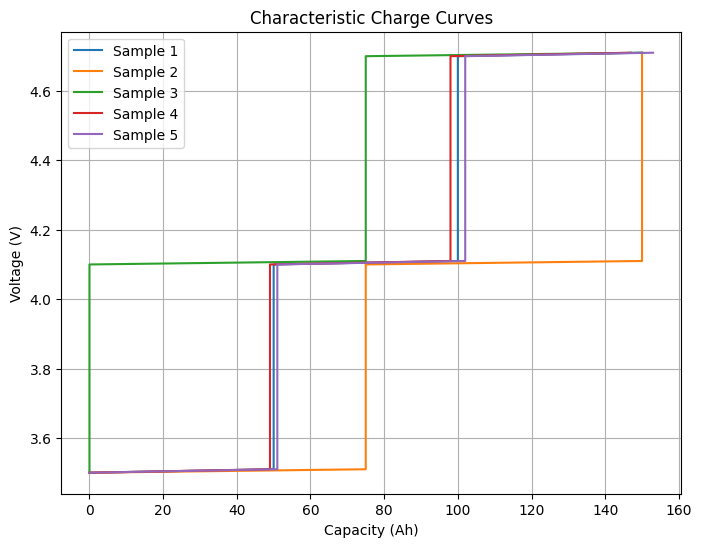

In [4]:
# Plotting capacity vs. voltage for each sample
plt.figure(figsize=(8, 6))
for sample_name, capacities in samples.items():
    plt.plot(capacities, voltage, label=sample_name)

plt.xlabel('Capacity (Ah)')
plt.ylabel('Voltage (V)')
plt.title('Characteristic Charge Curves')
plt.legend()
plt.grid(True)
plt.show()

## 2. Data Matrix Construction
We construct the data matrix **X** by arranging the cumulative capacity samples.


In [5]:
# Transpose the DataFrame to get samples as rows
X = df.transpose().values
print("Data Matrix X:\n", X)

Data Matrix X:
 [[  0  50  50 100 100 150]
 [  0  75  75 150 150 150]
 [  0   0   0  75  75 150]
 [  0  49  49  98  98 147]
 [  0  51  51 102 102 153]]


## 3. Data Centering
We compute the mean of each column (voltage point) and center the data by subtracting the mean.

In [6]:
# Compute the mean of each voltage point (column)
mean_capacity = np.mean(X, axis=0)
print("Mean Capacity at Each Voltage:", mean_capacity)

# Center the data
X_centered = X - mean_capacity
print("Centered Data Matrix X':\n", X_centered)

Mean Capacity at Each Voltage: [  0.  45.  45. 105. 105. 150.]
Centered Data Matrix X':
 [[  0.   5.   5.  -5.  -5.   0.]
 [  0.  30.  30.  45.  45.   0.]
 [  0. -45. -45. -30. -30.   0.]
 [  0.   4.   4.  -7.  -7.  -3.]
 [  0.   6.   6.  -3.  -3.   3.]]


## 4. Covariance Matrix Calculation

Calculate the covariance matrix **C** from the centered data.

In [7]:
# Compute the covariance matrix
C = np.cov(X_centered, rowvar=False)
print("Covariance Matrix C:\n", C)

Covariance Matrix C:
 [[  0.     0.     0.     0.     0.     0.  ]
 [  0.   750.5  750.5  657.25 657.25   1.5 ]
 [  0.   750.5  750.5  657.25 657.25   1.5 ]
 [  0.   657.25 657.25 752.   752.     3.  ]
 [  0.   657.25 657.25 752.   752.     3.  ]
 [  0.     1.5    1.5    3.     3.     4.5 ]]


## 5. Eigenvalue and Eigenvector Computation

Compute the eigenvalues and eigenvectors of the covariance matrix.

In [8]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(C)

# Sort eigenvalues and eigenvectors in descending order
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [ 2.81700806e+03  1.88011363e+02  4.48057891e+00  0.00000000e+00
 -5.30373576e-15 -3.14433312e-13]
Eigenvectors:
 [[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [-4.99713543e-01 -5.00275525e-01 -3.28230811e-03  0.00000000e+00
   5.41831964e-03  7.07086022e-01]
 [-4.99713543e-01 -5.00275525e-01 -3.28230811e-03  0.00000000e+00
  -5.41831964e-03 -7.07086022e-01]
 [-5.00285013e-01  4.99691017e-01  4.87788968e-03  0.00000000e+00
   7.07086022e-01 -5.41831964e-03]
 [-5.00285013e-01  4.99691017e-01  4.87788968e-03  0.00000000e+00
  -7.07086022e-01  5.41831964e-03]
 [-1.60029789e-03  8.15927419e-03 -9.99965432e-01  0.00000000e+00
  -2.10334002e-16  9.67803742e-17]]


## 6. Data Projection onto Principal Components

Project the centered data onto the first two principal components.

In [9]:
# Select the top principal components
num_components = 3
components = eigenvectors[:, :num_components]
print("Components:\n", components.T.round(3))
# Project the data
Z = np.dot(X_centered, components.round(3))
print("Projected Data Z:\n", Z)

Components:
 [[ 0.    -0.5   -0.5   -0.5   -0.5   -0.002]
 [-0.    -0.5   -0.5    0.5    0.5    0.008]
 [ 0.    -0.003 -0.003  0.005  0.005 -1.   ]]
Projected Data Z:
 [[ 0.0000e+00 -1.0000e+01 -8.0000e-02]
 [-7.5000e+01  1.5000e+01  2.7000e-01]
 [ 7.5000e+01  1.5000e+01 -3.0000e-02]
 [ 3.0060e+00 -1.1024e+01  2.9060e+00]
 [-3.0060e+00 -8.9760e+00 -3.0660e+00]]


## 7. Interpretation of Results


### Plotting the Projected Data

In [10]:
# Create a DataFrame for projected data
projected_df = pd.DataFrame(Z, index=samples.keys(), columns=['PC1', 'PC2', 'PC3'])
projected_df.round(3)

,PC1,PC2,PC3
Sample 1,0.000,-10.000,-0.080
Sample 2,-75.000,15.000,0.270
Sample 3,75.000,15.000,-0.030
Sample 4,3.006,-11.024,2.906
Sample 5,-3.006,-8.976,-3.066


### Plotting the Samples in Principal Component Space

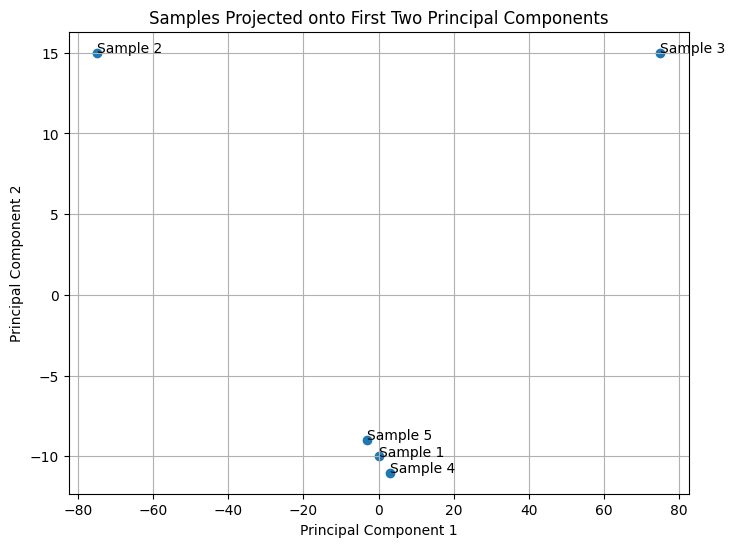

In [11]:
# Scatter plot of the samples in the principal component space
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1])

for i, sample_name in enumerate(samples.keys()):
    plt.annotate(sample_name, (Z[i, 0], Z[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Samples Projected onto First Two Principal Components')
plt.grid(True)
plt.show()

## 8. Plotting Principal Components


### Plotting Eigenvector Values vs. Voltage
Instead of plotting the principal components as vectors, we will plot the eigenvector values (loadings) against the voltage to better visualize how each voltage point contributes to each principal component.

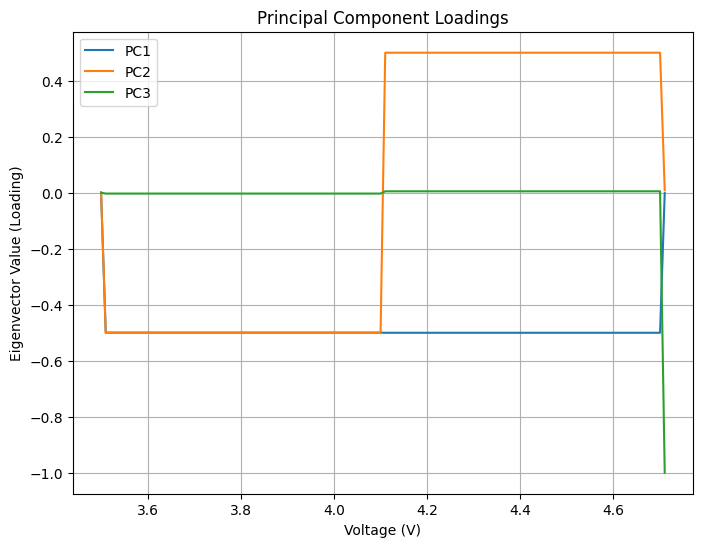

In [12]:
# Plotting the eigenvector values for the principal components
plt.figure(figsize=(8, 6))

plt.plot(voltage, eigenvectors[:, 0], label='PC1')
plt.plot(voltage, eigenvectors[:, 1], label='PC2')
plt.plot(voltage, eigenvectors[:, 2], label='PC3')

plt.xlabel('Voltage (V)')
plt.ylabel('Eigenvector Value (Loading)')

plt.title('Principal Component Loadings')
plt.legend()
plt.grid(True)
plt.show()